# $k$-nearest neighbors for Classification

$k$-nearest neighbor classifier ($k$NN) is a particularly interesting algorithm because it is fundamentally different from the learning algorithms we have discussed so far.

$k$NN is a typical example of a $\textbf{lazy learner}$. It is called lazy not because of its apparent simplicity, but because it doesn't learn a discriminative function from the traning data but memorizes the training dataset instead.

The kNN algorithm itself is fairly straightforward and can be summarized by the following steps:
- Step 1: Chose the number of k and a distance metric. The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice. 
- Step 2: Find the k nearest neighbors of the sample/instance/entity that we want to classify
- Step 3: Assign the class label by majority vote

Hence, based on the chosen distance metric, the $k$NN alforithm finds the $k$ samples in the training dataset that are closest (most similar) to the point that we want to classify. The class label of the new data point is then determined by a majority vote among its $k$ nearest neighbors. That is, the new data point we would like to classify is assigned the data class which has the most representatives within the nearest neighbors of that point.

Despite its simplicity, nearest neighbors has been successful in a large number of classification and regression problems, including handwritten digits or satellite image scenes. Being a non-parametric method, it is often successful in classification situations where the decision boundary is very irregular.

The classes in sklearn.neighbors can handle either Numpy arrays or scipy.sparse matrices as input. 


$\textit{scikit-learn}$ implements two different nearest neighbors classifiers: $\textit{KNeighborsClassifier}$ implements learning based on the k nearest neighbors of each query point, where k is an integer value specified by the user. $\textit{RadiusNeighborsClassifier}$ implements learning based on the number of neighbors within a fixed radius r of each training point, where r is a floating-point value specified by the user.
The k-neighbors classification in $\textit{KNeighborsClassifier}$ is the more commonly used of the two techniques. The optimal choice of the value k is highly data-dependent: in general a larger $k$ suppresses the effects of noise (i.e., it is less prone to overfitting), but makes the classification boundaries less distinct.

The basic nearest neighbors classification uses uniform weights: that is, the value assigned to a query point is computed from a simple majority vote of the nearest neighbors. Under some circumstances, it is better to weight the neighbors such that nearer neighbors contribute more to the fit. This can be accomplished through the weights keyword. The default value, $\textit{weights = 'uniform'}$, assigns uniform weights to each neighbor. $\textit{weights = 'distance'}$ assigns weights proportional to the inverse of the distance from the query point. Alternatively, a user-defined function of the distance can be supplied which is used to compute the weights.

In [51]:
# To write a Python 2/3 compatible codebase, the first step is to add this line to the top of each module
from __future__ import division, print_function, unicode_literals

# The simplest possible classifier is the nearest neighbor: given a new observation X_test, find in the training set 
#(i.e. the data used to train the estimator) the observation(s) with the closest feature vector.
# This script illustrates the usage of kNN. 

# Import necessary libraries and specify that graphs should be plotted inline.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap # Learn more about matplotlib.colors here https://matplotlib.org/3.1.1/api/colors_api.html

################################################## Load Data ##################################################

# sklearn.neighbors provides functionality for unsupervised and supervised neighbors-based learning methods
# Documentation available at https://scikit-learn.org/stable/modules/neighbors.html
from sklearn import neighbors, datasets 

# Import iris data set
# See 'ISOM 672_Decision Trees' for a description of this data set

# Load the sample dataset and store it under the name iris
iris = datasets.load_iris()

# Retrieve features/attributes of dataset iris
X = iris.data[:, :2]  # we only take the first two features in order to easily visualize the results. 
                      # We could avoid this ugly slicing by using a two-dim dataset

# Retrieve target variable of dataset iris
y = iris.target

# NOTE: At this stage, we would normally explore the data before we build a model. Please see the Jupyter 
# notebook 'ISOM 672_Decision Trees' for the exploration of this dataset

In [52]:
################################# Function to Visualize Decision Regions of kNN #################################

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# This function visualizes the "decision surfaces" of the kNN algorithm
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

Splitting data into 70% training and 30% test data:


In [53]:
############################################## Split the Data ##############################################

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [54]:
########################################## Distribution Target Variable ##########################################

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


Standardizing the features:

In [55]:
############################################# Normalization #############################################

from sklearn.preprocessing import StandardScaler # Standardize features by removing the mean and scaling to unit variance

sc = StandardScaler()
sc.fit(X_train) # Compute the mean and std to be used for later scaling.

X_train_std = sc.transform(X_train) # Perform standardization of train set X by centering and scaling
X_test_std = sc.transform(X_test) # Perform standardization of test set Xby centering and scaling

In [56]:
############################################# Train the Model #############################################

from sklearn import neighbors, datasets

# KNeighborsClassifier is a classifier implementing the k-nearest neighbors vote.
# Learn more about it here https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Set parameters of KNeighborsClassifier
knn = neighbors.KNeighborsClassifier(n_neighbors=5, #n_neighbors is the k in the kNN
                           p=2, 
                           metric='minkowski') #The default metric is minkowski, which is a generalization of the Euclidean distance
                                               # with p=2 is equivalent to the standard Euclidean distance.
                                               # with p=1 is equivalent to the Mahattan distance.

# Train the model      
knn = knn.fit(X_train_std, y_train)  

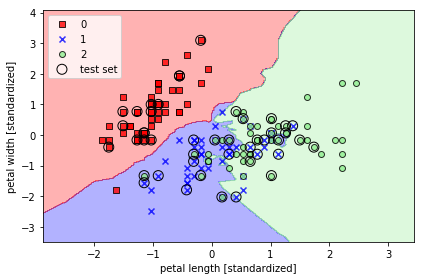

In [57]:
####################################### Visualize decision regions #######################################

# Stacks needed for visualization of decision regions
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# Visualization of decision regions
plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

# Set parameters for visualization
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [58]:
############################################# Evaluate the Model #############################################

# The sklearn.metrics module includes score functions, performance metrics and pairwise metrics 
# and distance computations.
# https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report

# Estimate the predicted values by applying the kNN algorithm
y_pred = knn.predict(X_test_std)
y_pred_insample = knn.predict(X_train_std)

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy (in-sample): %.2f' % accuracy_score(y_train, y_pred_insample))

# F1 score
print('F1 score (out-of-sample): ', f1_score(y_test, y_pred, average='macro'))
print('F1 score (in-sample)    : ', f1_score(y_train, y_pred_insample, average='macro'))

# Kappa score
print('Kappa score (out-of-sample): ', cohen_kappa_score(y_test, y_pred))
print('Kappa score (in-sample)    : ', cohen_kappa_score(y_train, y_pred_insample))

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy (out-of-sample): 0.71
Accuracy (in-sample): 0.88
F1 score (out-of-sample):  0.708193041526
F1 score (in-sample)    :  0.875870836512
Kappa score (out-of-sample):  0.566666666667
Kappa score (in-sample)    :  0.814285714286
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        15
 versicolor       0.58      0.47      0.52        15
  virginica       0.56      0.67      0.61        15

avg / total       0.71      0.71      0.71        45



In [59]:
############################################# Find Nearest Neighbors #############################################

# Finds the K-neighbors of a point. 
print('The k nearest neighbors (and the corresponding distances) to user [1, 1] are:', knn.kneighbors([[1., 1.]]))

# Finds the K-neighbors of all points in the training set.
print('The k nearest neighbors to each user are:', knn.kneighbors(X, return_distance=False)) 

# Computes the (weighted) graph of k-Neighbors for points in X (complete training set)
A = knn.kneighbors_graph(X) # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.kneighbors_graph.html
A.toarray()

The k nearest neighbors (and the corresponding distances) to user [1, 1] are: (array([[ 0.46381053,  0.52062957,  0.65777865,  0.66031252,  0.70937413]]), array([[ 3, 25, 85, 57, 90]]))
The k nearest neighbors to each user are: [[80 32 57 70 62]
 [80 32 57 70  6]
 [80 32 57 70 62]
 [80 32 57 70 62]
 [80 32 57 70 62]
 [80 32 57 70 62]
 [80 32 57 70 62]
 [80 32 57 70 62]
 [80 32 57 70 62]
 [80 32 57 70  6]
 [80 32 57 70  6]
 [80 32 57 70 62]
 [80 32 57 70  6]
 [80 32 57 70 62]
 [80 32 57 70  6]
 [80 32 57 70 62]
 [80 32 57 70 62]
 [80 32 57 70 62]
 [80 32 57 70  6]
 [80 32 57 70 62]
 [80 32 57 70  6]
 [80 32 57 70 62]
 [80 32 57 62 70]
 [80 32 57 70  6]
 [80 32 57 70 62]
 [80 32 57 70  6]
 [80 32 57 70 62]
 [80 32 57 70  6]
 [80 32 57 70  6]
 [80 32 57 70 62]
 [80 32 57 70  6]
 [80 32 57 70  6]
 [80 32 57 70 62]
 [80 32 57 70 62]
 [80 32 57 70  6]
 [80 32 57 70  6]
 [80 32 57 70  6]
 [80 32 57 70  6]
 [80 32 57 70 62]
 [80 32 57 70  6]
 [80 32 57 70 62]
 [80 32 57 70  6]
 [80 32 57 70 62

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

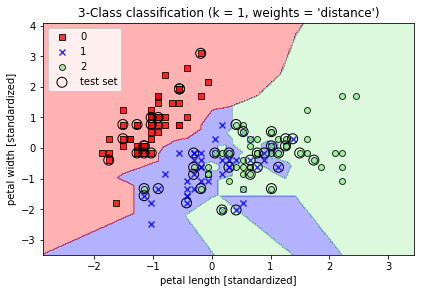

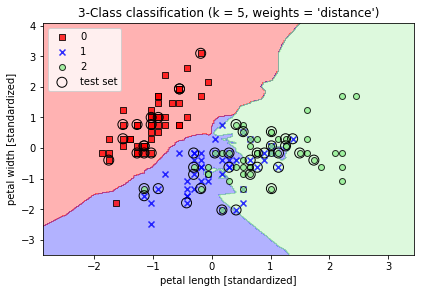

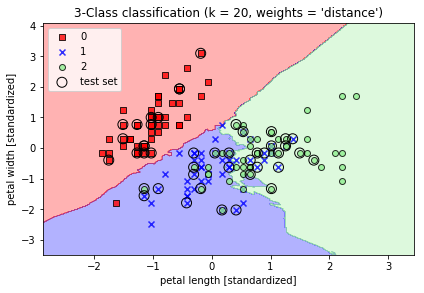

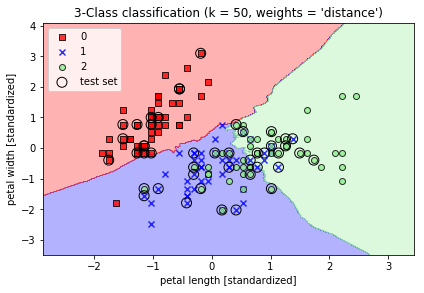

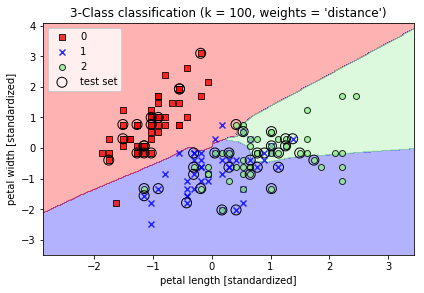

In [60]:
########################### Visualize decision regions for different k of kNN ###########################


from sklearn import neighbors, datasets
## Visualization of the decision boundaries


from sklearn import neighbors, datasets


for n_neighbors in [1,5,20,50,100]: # Different k values
    knn = neighbors.KNeighborsClassifier(n_neighbors, 
                               p=2, 
                               metric='minkowski') #The default metric is minkowski, which is a generalization of the Euclidean distance
                                                   # with p=2 is equivalent to the standard Euclidean distance.
    knn = knn.fit(X_train_std, y_train)            # with p=1 is equivalent to the Mahattan distance.

    X_combined_std = np.vstack((X_train_std, X_test_std))
    y_combined = np.hstack((y_train, y_test))

    plot_decision_regions(X_combined_std, y_combined, 
                          classifier=knn, test_idx=range(105, 150))

    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, 'distance'))
    plt.show()

**The curse of dimansionality**

It is important to mention that $k$NN is very susceptible to overfitting due to the **curse of dimensionality**. The curse of dimensionality describes the phenomenon where the eatures space becomes increasingly sparse for an increasing number of dimensions of a fixed-size training dataset. Intuitively, we can think of even the closest neighbors being too far away in a high-dimension space to give a good estimate.

We have discussed the concept of regularization in the context of logistic regression as one way to avoid overfitting. However, in models where regularization is not applicable such as decision trees and $k$NN, we can use feature selection and dimensionality reduction to help us avoid the curse of dimensionality.

# $k$NN for Numeric Prediction [To be continued...]

In [61]:
# For kNN, as the number of features becomes large, the number of training points
# required for a good estimator grows exponentially!
# Hence, really big (long) data set might be needed when you have many features (i.e., wide data set). 

In [62]:
## Nearest Neighbors regression

# This following example demonstrates the resolution of a regression problem using a k-Nearest Neighbor 
# and the interpolation of the target using both barycenter and constant weights.

# Generate sample data
np.random.seed(42)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

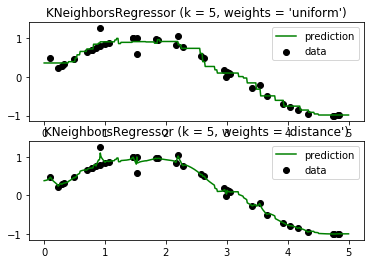

In [63]:
# Fit regression model
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(T, y_, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.show()